<a href="https://colab.research.google.com/github/Saumya0330/Hubble-Parameter-and-Age-of-Universe-Prediction/blob/main/ISA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the Hubble Parameter and the Age of the Universe using Supernovae Ia Data- Jupyter Notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.constants import c
from astropy import units as u

In [ ]:
#loading the dataset
df = pd.read_csv('Pantheon+SH0ES.dat', delim_whitespace=True)
print(df.head())

             CID  IDSURVEY      zHD   zHDERR     zCMB  zCMBERR     zHEL  \
0         2011fe        51  0.00122  0.00084  0.00122  0.00002  0.00082   
1         2011fe        56  0.00122  0.00084  0.00122  0.00002  0.00082   
2         2012cg        51  0.00256  0.00084  0.00256  0.00002  0.00144   
3         2012cg        56  0.00256  0.00084  0.00256  0.00002  0.00144   
4  1994DRichmond        50  0.00299  0.00084  0.00299  0.00004  0.00187   

   zHELERR  m_b_corr  m_b_corr_err_DIAG  ...  PKMJDERR  NDOF   FITCHI2  \
0  0.00002   9.74571           1.516210  ...    0.1071    36   26.8859   
1  0.00002   9.80286           1.517230  ...    0.0579   101   88.3064   
2  0.00002  11.47030           0.781906  ...    0.0278   165  233.5000   
3  0.00002  11.49190           0.798612  ...    0.0667    55  100.1220   
4  0.00004  11.52270           0.880798  ...    0.0522   146  109.8390   

    FITPROB  m_b_corr_err_RAW  m_b_corr_err_VPEC  biasCor_m_b  biasCorErr_m_b  \
0  0.864470            

/tmp/ipython-input-2-1156086479.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Pantheon+SH0ES.dat', delim_whitespace=True)


<Axes: >

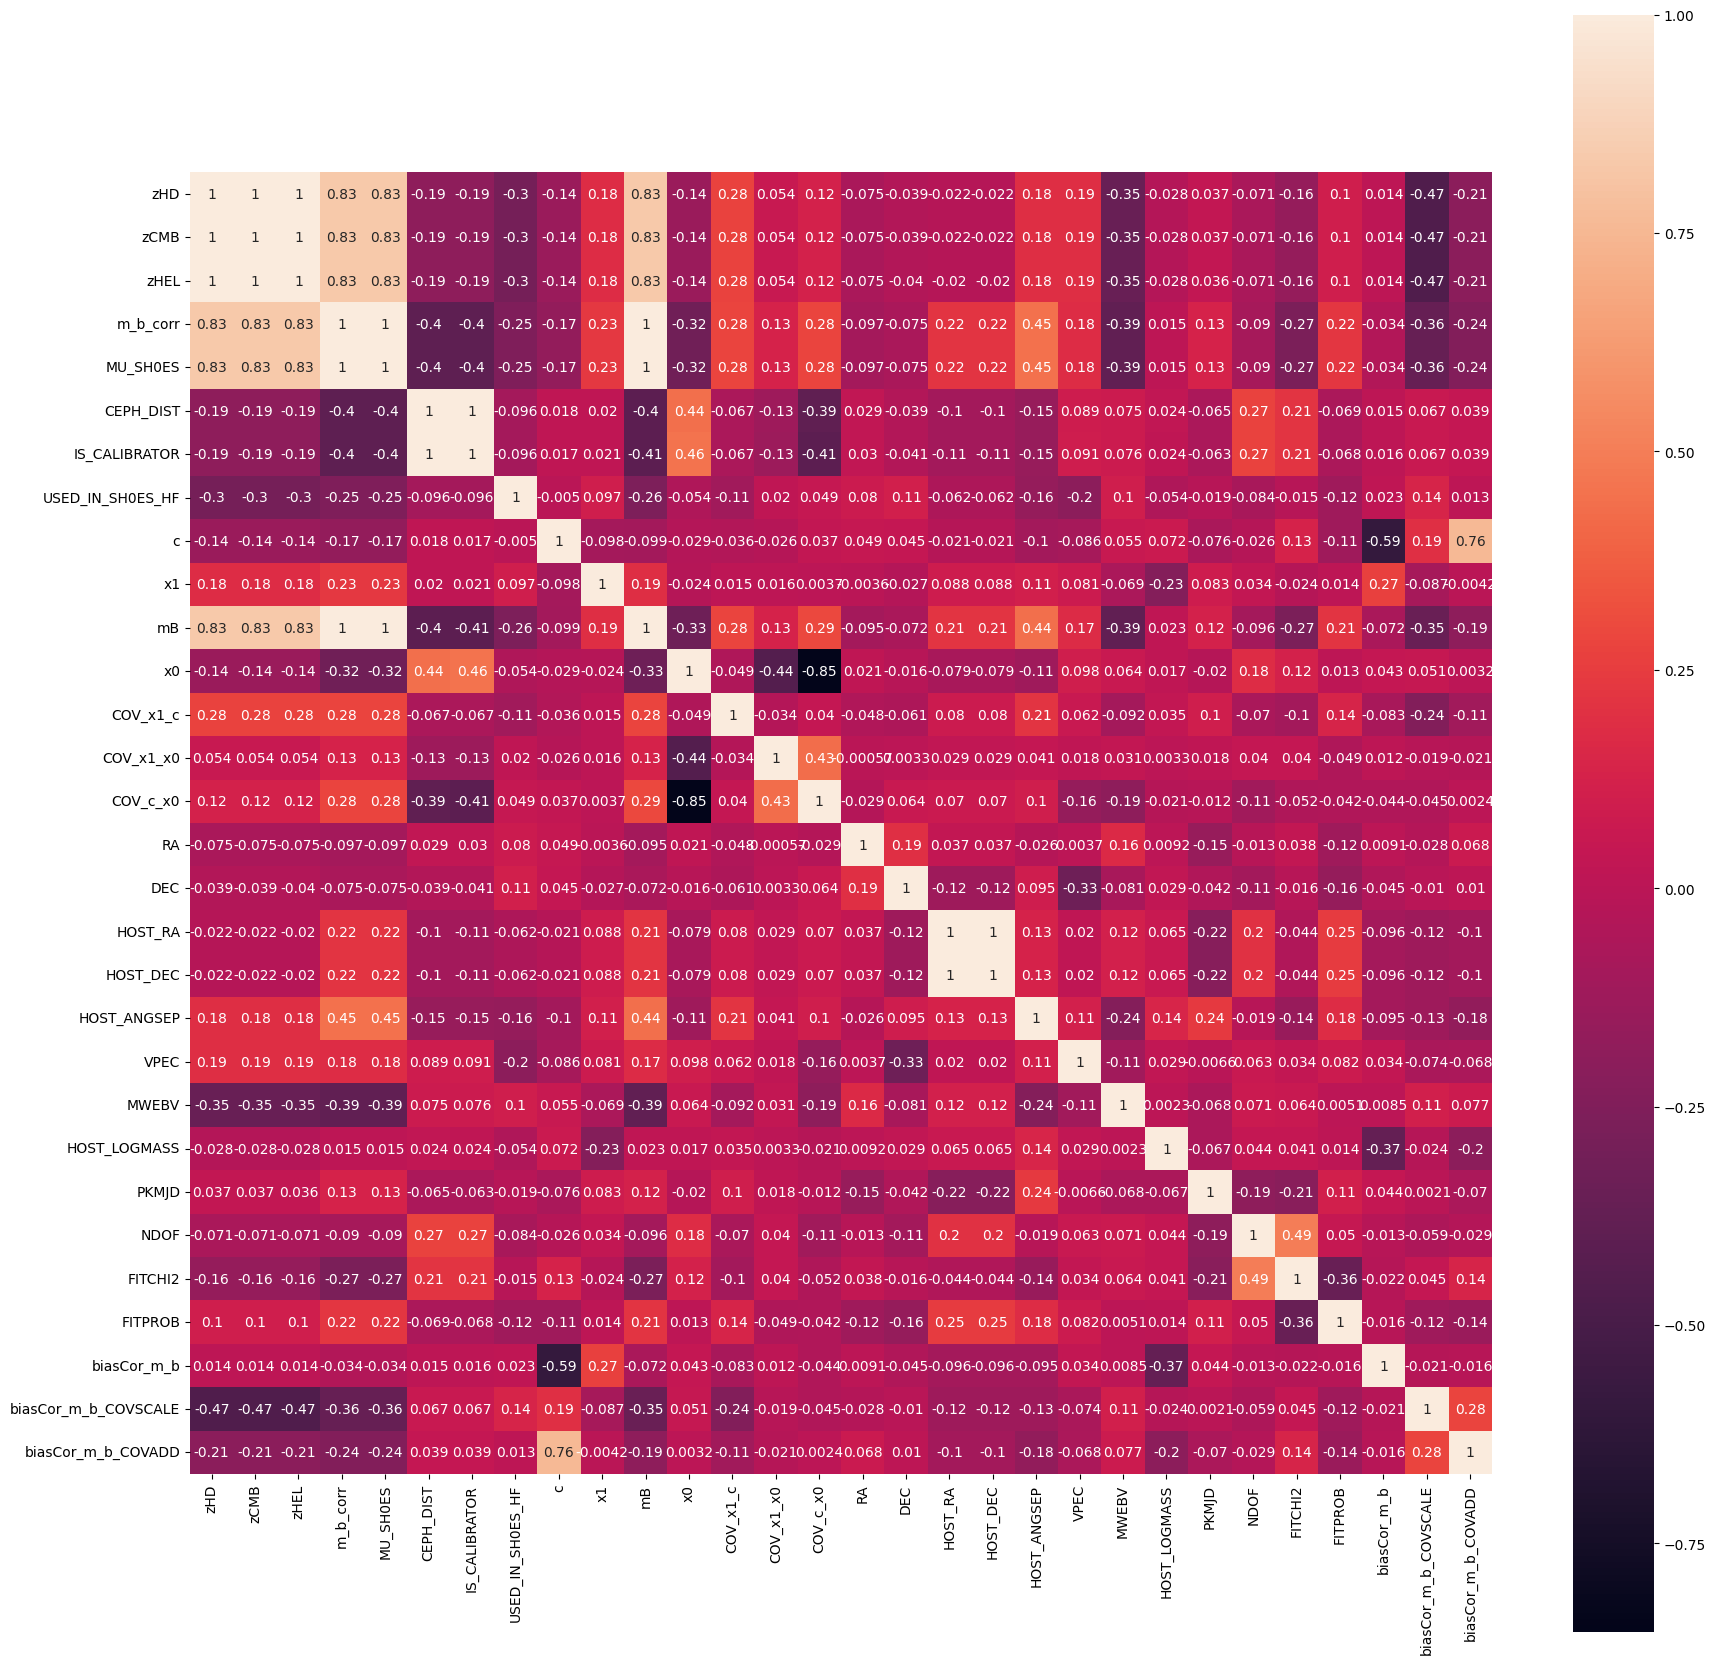

In [ ]:
 #remove the string column
df1=df.drop(columns=['CID','IDSURVEY'])
# Remove columns that contain 'err' or 'error' (case-insensitive)
df1 = df1.loc[:, ~df1.columns.str.contains('err|error', case=False)]

df1.head()
plt.subplots(figsize=(21,21))
sns.heatmap(df1.corr(), square=True, annot=True)
#correlation heatmap for all columns

In [ ]:
#extracting the required columns
data = df[['zHD','MU_SH0ES','MU_SH0ES_ERR_DIAG']]
print(data.head())
# HD redshift, distance modulus, and asscoiated uncertainty

       zHD  MU_SH0ES  MU_SH0ES_ERR_DIAG
0  0.00122   28.9987           1.516450
1  0.00122   29.0559           1.517470
2  0.00256   30.7233           0.782372
3  0.00256   30.7449           0.799068
4  0.00299   30.7757           0.881212


In [ ]:
data.isnull().sum() #checking to see that there are no null values

,0
zHD,0
MU_SH0ES,0
MU_SH0ES_ERR_DIAG,0



Pearsons correlation between zHD and MU_SH0ES: 0.832


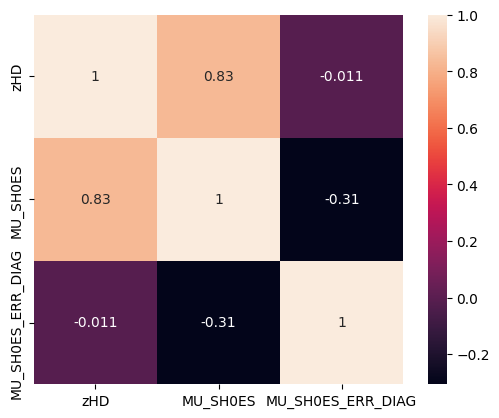

In [ ]:
sns.heatmap(data.corr(),square=True, annot=True)
#correlation between extracted features
from scipy.stats import pearsonr

corr, _ = pearsonr(data['zHD'], data['MU_SH0ES'])
print('\nPearsons correlation between zHD and MU_SH0ES: %.3f' % corr)

we can see that there is high positive correlation between the distance modulus and Hubble daigram redshift due to the relation :

μ=m−M=5log 10(DL)+25

where luminosity distance (DL) is directly proportional to redshift (z) and its value can be calculated using a cosmological model with chosen values if H0 and other constants.




In [ ]:
#converting these three columns to numpy arrays
z = np.array(data['zHD'])
mu = np.array(data['MU_SH0ES'])
mu_err = np.array(data['MU_SH0ES_ERR_DIAG'])
#these are the observed values from dataset

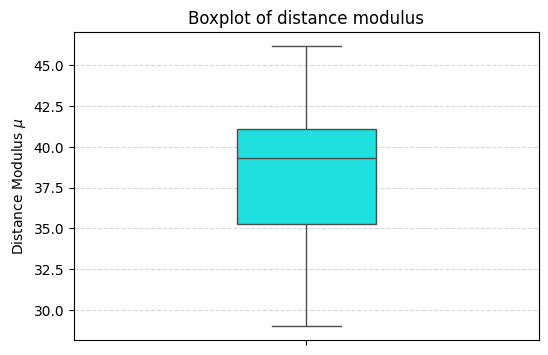

In [ ]:
#A boxplot just to check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y=mu, color='cyan', width=0.3)
plt.title('Boxplot of distance modulus')
plt.ylabel('Distance Modulus $\mu$')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

As we can see there are no outliers for $\mu$ values in our dataset

#Plotting Hubble Diagram

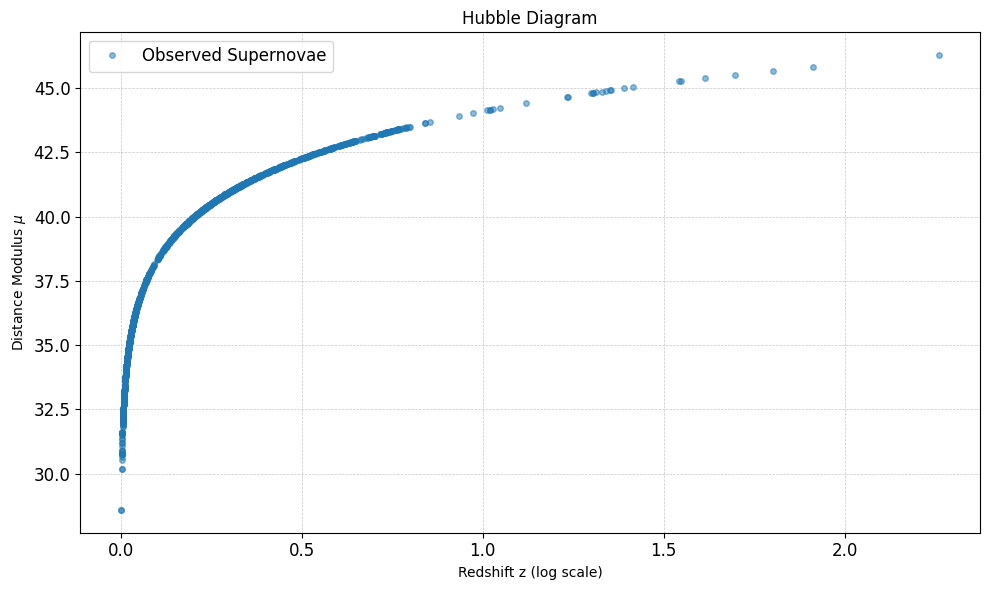

In [ ]:
#plotting the hubble diagram i.e redshift vs distance modulus
plt.figure(figsize=(10, 6))
plt.plot(z,mu,'o', label='Observed Supernovae', alpha=0.5, markersize=4)
plt.xlabel('Redshift z (log scale)')
plt.ylabel('Distance Modulus $\mu$')
plt.title('Hubble Diagram')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In this plot we can't really see the linear nature of plot at low redshifts, so let us take the x axis scale as logarithmic


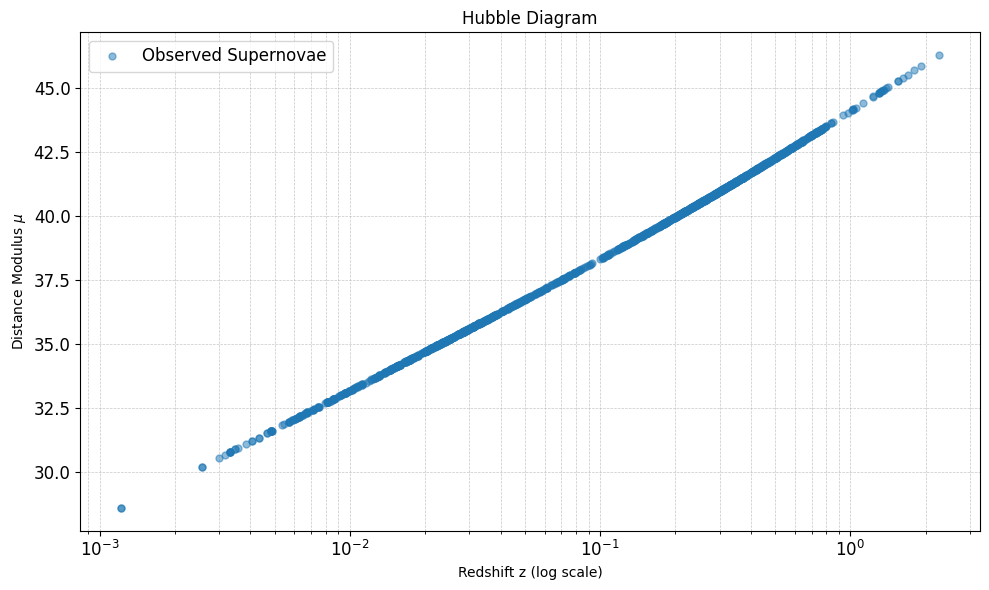

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(z,mu,'o', label='Observed Supernovae', alpha=0.5, markersize=5)
plt.xlabel('Redshift z (log scale)')
plt.xscale('log')
plt.ylabel('Distance Modulus $\mu$')
plt.title('Hubble Diagram')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Plot shows that μ ~ log(z) at low redshifts

## 🧮 Cosmological Model

The theoretical framework based on the flat $\Lambda\mathrm{CDM}$ model. This involves:

- The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus is:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- And the corresponding luminosity distance :
  
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

These equations allow us to compute the expected distance modulus from a given redshift $z$, Hubble constant $H_0$, and matter density parameter $\Omega_m$.


In [ ]:
print(np.isfinite(data).sum(),'\n', np.isinf(data).sum(), '\n',np.isnan(data).sum())
print(data.shape)
#Checking that there are no infinite or nan values in the dataset before fitting.

zHD                  1701
MU_SH0ES             1701
MU_SH0ES_ERR_DIAG    1701
dtype: int64 
 zHD                  0
MU_SH0ES             0
MU_SH0ES_ERR_DIAG    0
dtype: int64 
 zHD                  0
MU_SH0ES             0
MU_SH0ES_ERR_DIAG    0
dtype: int64
(1701, 3)


In [ ]:
#hubble parameter E(z) for flat LambdaCDM
def E(z, H0, Om):
    return np.sqrt(Om * (1 + z)**3 + (1 - Om))

#define luminosity distance in Mpc
def lum_dist(z, H0, Om):
    if z == 0:
        return 0
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, H0, Om), 0, z)
    return (1 + z) * c.to('km/s') / H0 * integral

#define theoretical distance modulus
def mu_model(z, H0, Om):
  return np.array([5*np.log10(lum_dist(z_i, H0, Om).value) + 25 for z_i in z])

#Fitting theoretical model to observed Supernova Data

We will perform a non-linear least squares fit to the supernova data using our theoretical model for $\mu(z)$. This fitting procedure will estimate the best-fit values for the Hubble constant $ H_0$ and matter density parameter $\Omega_m$, along with their associated uncertainties.


The initial guess is:
- $ H_0 = 70 \, \text{km/s/Mpc} $
- $\Omega_m =0.3$


In [ ]:
initial_guess=[70, 0.3]
bounds=([0,0],[np.inf,1]) #creating bound to prevent generation of bad values for both constants
#H0 can be between 0 and inf, while matter density must be between 0 and 1
popt, pcov = curve_fit(mu_model, z, mu, p0=initial_guess, sigma=mu_err, absolute_sigma=True, bounds=bounds) #fitting the observed values with initial guess and error
H0_fit, Om_fit = popt #result of fitting gives optimum values
H0_err, Om_err = np.sqrt(np.diag(pcov)) #extract uncertainity from covariance matrix

print(f"Best-fit H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Best-fit Ωm = {Om_fit:.3f} ± {Om_err:.3f}")

Best-fit H0 = 72.97 ± 0.26 km/s/Mpc
Best-fit Ωm = 0.351 ± 0.019


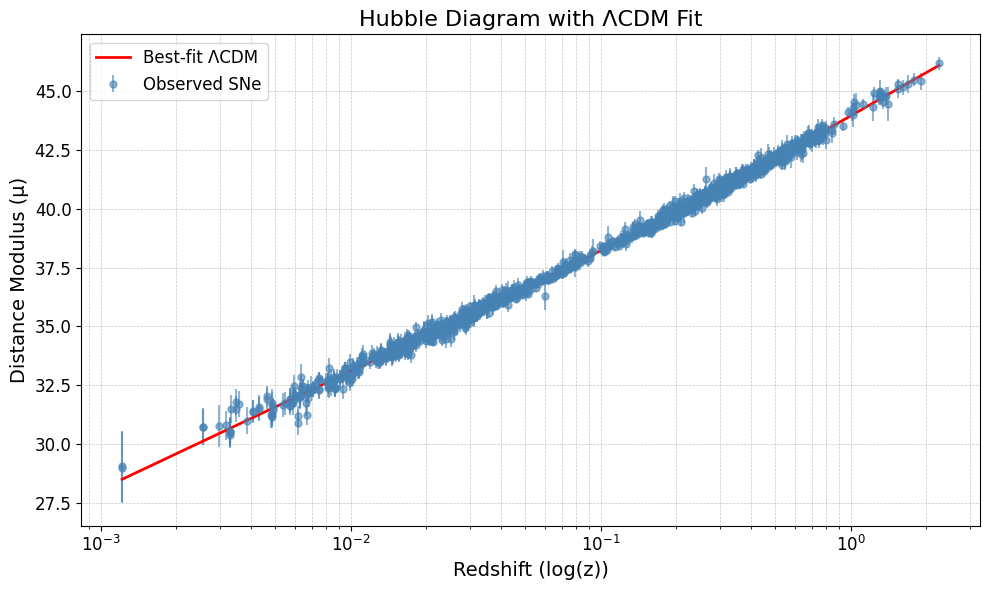

In [ ]:
# Compute model curve
z_fit = np.linspace(min(z), max(z), 200)
mu_fit = mu_model(z_fit, H0_fit, Om_fit)

plt.figure(figsize=(10, 6))

# Observed data with error bars
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=5,color='steelblue', alpha=0.6, label='Observed SNe')

plt.plot(z_fit, mu_fit, 'r-', linewidth=2, label='Best-fit ΛCDM')   # Best-fit model line

plt.xscale('log')   # Log scale for redshift axis
plt.xlabel('Redshift (log(z))', fontsize=14)
plt.ylabel('Distance Modulus (μ)', fontsize=14)
plt.title('Hubble Diagram with ΛCDM Fit', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

We can see that Pantheon+SH0ES data fits pretty well on the theoretical model

## ⏳ Estimate the Age of the Universe

Now that we have the best-fit values of $ H_0 $ and $ \Omega_m $, we can estimate the age of the universe. This is done by integrating the inverse of the Hubble parameter over redshift:

$$
t_0 = \int_0^\infty \frac{1}{(1 + z) H(z)} \, dz
$$

We convert $ H_0 $ to SI units and express the result in gigayears (Gyr). This provides an independent check on our cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.


In [ ]:
#function to calculate age of universe
def age_of_universe( H0, Om):
    def integrand(z):
        return 1 / (E(z, H0, Om)*(1+z))
    integral, _ = quad(integrand, 0, np.inf)
    H0_si = (H0 * u.km / u.s / u.Mpc).to(u.s**-1)
    t0_sec = integral/H0_si.value    # Convert to seconds
    t0_gyr = (t0_sec * u.s).to(u.Gyr)   #Convert to Gigayears
    return t0_gyr.value

In [ ]:
t0 = age_of_universe( H0_fit, Om_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")

Estimated age of Universe: 12.36 Gyr


In [ ]:
#verified the model with specified Planck CMB data
t0_planck = age_of_universe(H0=67.4, Om=0.315)
print(f"Planck-like universe age: {t0_planck:.2f} Gyr")

Planck-like universe age: 13.80 Gyr


In [ ]:
#estimated age using fixed Om=0.3 for calculated value of H0, without doing refitting of model for one parameter
t0_fixed = age_of_universe( H0_fit, 0.3)
print(f"Estimated age of Universe: {t0_fixed:.2f} Gyr")

Estimated age of Universe: 12.92 Gyr


#Plotting Age of the Universe vs $ \Omega_m $ Based on Obtained Best fit Value of $ H_0 $

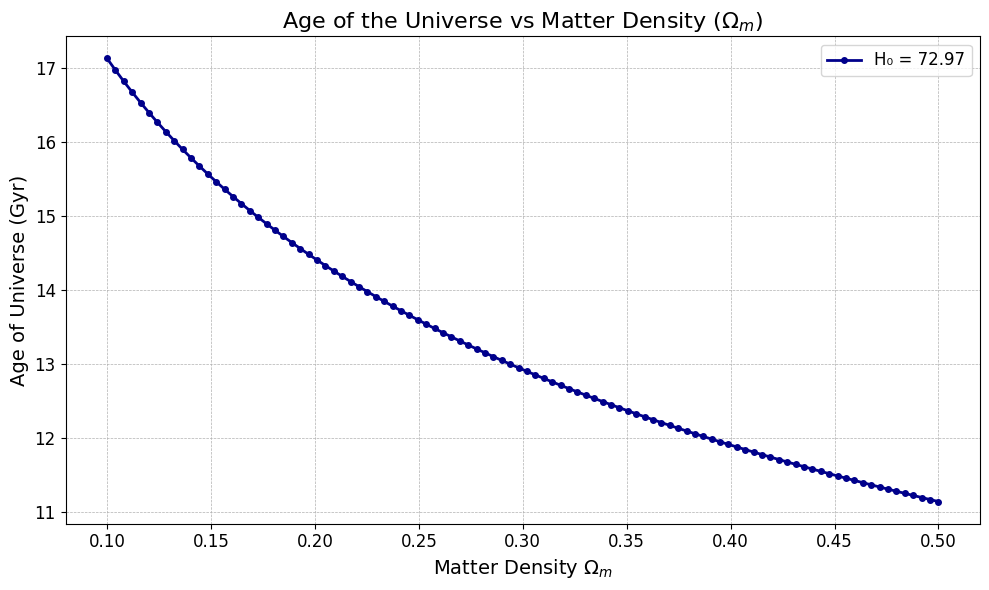

In [ ]:
age=[]
Om=np.linspace(0.1,0.5,100)
for O in Om:
  age.append(age_of_universe(H0_fit,O))

plt.figure(figsize=(10, 6))
plt.plot(Om, age, color='darkblue', linewidth=2, linestyle='-', marker='o', markersize=4, label=f'H₀ = {H0_fit:.2f}')
plt.title('Age of the Universe vs Matter Density ($\\Omega_m$)', fontsize=16)
plt.xlabel('Matter Density $\\Omega_m$', fontsize=14)
plt.ylabel('Age of Universe (Gyr)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Observation: As Ω𝑚 increases, the age of the universe decreases.

As Ω𝑚 increases, the gravitational influence of matter becomes stronger, causing greater deceleration of the universe's expansion. To reach its present size with the same expansion rate 𝐻0, the universe must have expanded faster in the past — meaning it had less time to evolve. Hence, the age of the universe decreases as Ω𝑚 increases.

#Plotting Age of the Universe vs $ H_0 $ Based on Obtained Best fit Value of $ \Omega_m $

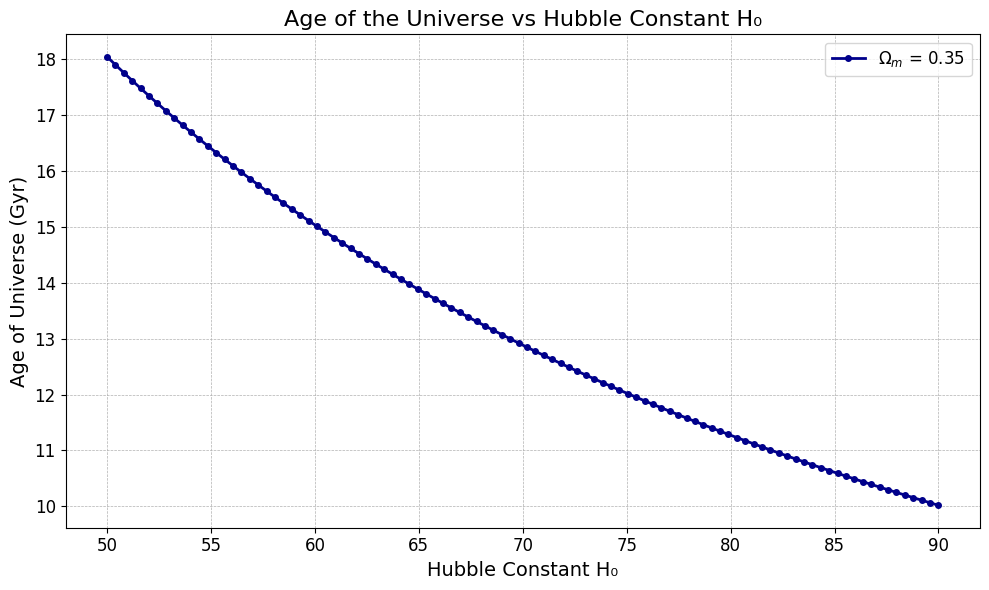

In [ ]:
age=[]
H=np.linspace(50,90,100)
for h in H:
  age.append(age_of_universe(h,Om_fit))

plt.figure(figsize=(10, 6))
plt.plot(H, age, color='darkblue', linewidth=2, linestyle='-', marker='o', markersize=4, label=f'$\\Omega_m$ = {Om_fit:.2f}')
plt.title('Age of the Universe vs Hubble Constant H₀', fontsize=16)
plt.xlabel('Hubble Constant H₀' , fontsize=14)
plt.ylabel('Age of Universe (Gyr)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

We get a similar graph upon varying the Hubble constant and fixing the matter density.

A larger H0 means that the universe is expanding faster today, meaning it needed less time to reach the current size, therfore higher the Hubble constant (Rate of Expansion), lower the age of Universe.

## 📊 Analyze Residuals

To evaluate how well our cosmological model fits the data, we compute the residuals:

$$
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
$$

Plotting these residuals against redshift helps identify any systematic trends, biases, or outliers. A good model fit should show residuals scattered randomly around zero without any significant structure.


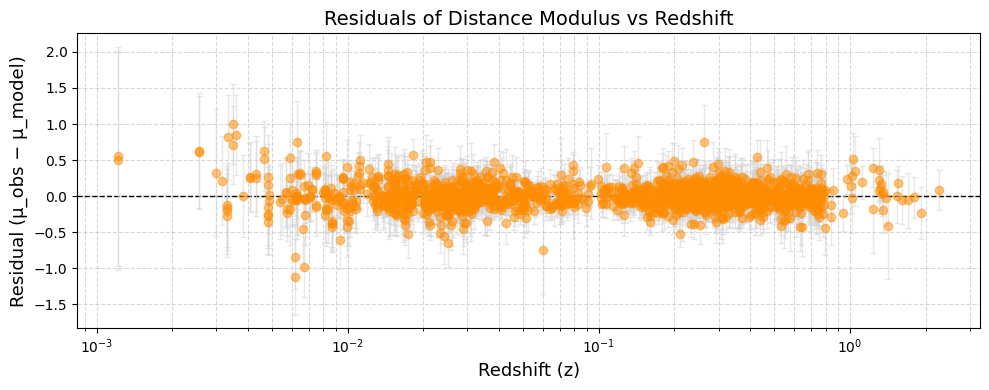

In [ ]:
#computing predicted values from model
mu_pred = mu_model(z, H0_fit, Om_fit)
#computing residuals
residuals = mu - mu_pred

#plotting residuals
plt.figure(figsize=(10, 4))

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # horizontal zero line
plt.errorbar(z, residuals, yerr=mu_err, fmt='o', color='darkorange', ecolor='lightgray', elinewidth=1, capsize=2, alpha=0.5)

plt.xscale('log')  # log-scale for redshift
plt.xlabel('Redshift (z)', fontsize=13)
plt.ylabel('Residual (μ_obs − μ_model)', fontsize=13)
plt.title('Residuals of Distance Modulus vs Redshift', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Percentage of residuals within ±0.5 mag
within_05 = np.sum(np.abs(residuals) <= 0.5) / len(residuals) * 100
print(f"{within_05:.1f}% of supernovae are within ±0.5 mag residuals.")

98.5% of supernovae are within ±0.5 mag residuals.


The maximum absolute error value is approximately 0.5, with only a few exceptions going up to 1, which can be considered as outliers.

ΛCDM model predictions match the observations well.

## 🔧 Fit with Fixed Matter Density

To reduce parameter degeneracy, let's fix $ \Omega_m = 0.3 $ and fit only for the Hubble constant $ H_0 $.


In [ ]:
def mu_fixed_Om(z, H0):
  return mu_model(z, H0, 0.3)

initial_guess_fixed=[70]
bounds=([0],[np.inf])
popt_fixed, pcov_fixed = curve_fit(mu_fixed_Om, z, mu, p0=initial_guess_fixed, sigma=mu_err, absolute_sigma=True, bounds=bounds)
H0_fit_fixed = popt_fixed[0]
H0_err_fixed = np.sqrt(np.diag(pcov_fixed))[0]

print(f"Best-fit H0 = {H0_fit_fixed:.2f} ± {H0_err_fixed:.2f} km/s/Mpc")

Best-fit H0 = 73.53 ± 0.17 km/s/Mpc


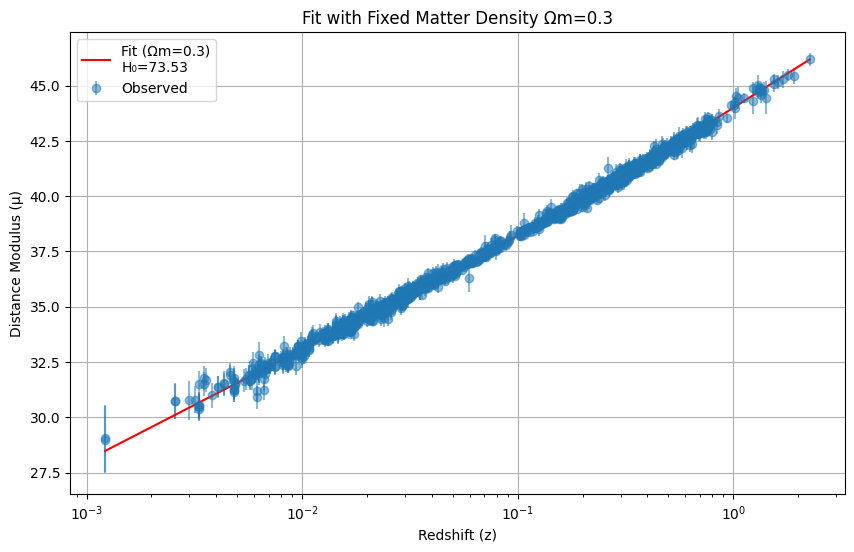

In [ ]:
z_fit = np.linspace(min(z), max(z), 200)
mu_fit_fixed = mu_fixed_Om(z_fit, H0_fit_fixed)

plt.figure(figsize=(10, 6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', label='Observed', alpha=0.5)
plt.plot(z_fit, mu_fit_fixed, 'r-', label=f'Fit (Ωm=0.3)\nH₀={H0_fit_fixed:.2f}')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Fit with Fixed Matter Density Ωm=0.3')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


In [ ]:
#calculating age of universe by using fixed matter density, and corresponding optimal Hubble Constant
t0 = age_of_universe( H0_fit_fixed, 0.3)
print(f"Estimated age of Universe: {t0:.2f} Gyr")

Estimated age of Universe: 12.82 Gyr


We get a better estimate of age of the universe and H0 by reducing degeneracy

## 🔍 Compare Low-z and High-z Subsamples

Finally, we examine whether the inferred value of $H_0$ changes with redshift by splitting the dataset into:
- **Low-z** supernovae ($ z < 0.1 $)
- **High-z** supernovae ($ z \geq 0.1 $)

We then fit each subset separately (keeping $ \Omega_m = 0.3 $) to explore any potential tension or trend with redshift.


In [ ]:
#low red shift arrays
z_low = z[z<0.1]
mu_low = mu[z<0.1]
mu_err_low = mu_err[z<0.1]

#high red shift arrays
z_high = z[z>=0.1]
mu_high = mu[z>=0.1]
mu_err_high = mu_err[z>=0.1]

In [ ]:
initial_guess = [70]
bounds = ([0], [np.inf])

# Fit low-z
popt_low, pcov_low = curve_fit(mu_fixed_Om, z_low, mu_low, p0=initial_guess, sigma=mu_err_low, absolute_sigma=True, bounds=bounds)
H0_low = popt_low[0]
H0_low_err = np.sqrt(pcov_low[0][0])

# Fit high-z
popt_high, pcov_high = curve_fit(mu_fixed_Om, z_high, mu_high, p0=initial_guess, sigma=mu_err_high, absolute_sigma=True, bounds=bounds)
H0_high = popt_high[0]
H0_high_err = np.sqrt(pcov_high[0][0])

print(f"Best-fit H0 for low-z: {H0_low:.2f} ± {H0_low_err:.2f} km/s/Mpc")
print(f"Best-fit H0 for high-z: {H0_high:.2f} ± {H0_high_err:.2f} km/s/Mpc")

Best-fit H0 for low-z: 73.01 ± 0.28 km/s/Mpc
Best-fit H0 for high-z: 73.85 ± 0.22 km/s/Mpc


In [ ]:
delta = H0_high - H0_low
sigma = np.sqrt(H0_high_err**2 + H0_low_err**2)
significance = delta / sigma
print(f"Difference: {delta:.2f} km/s/Mpc, Significance: {significance:.2f}σ")

Difference: 0.84 km/s/Mpc, Significance: 2.38σ


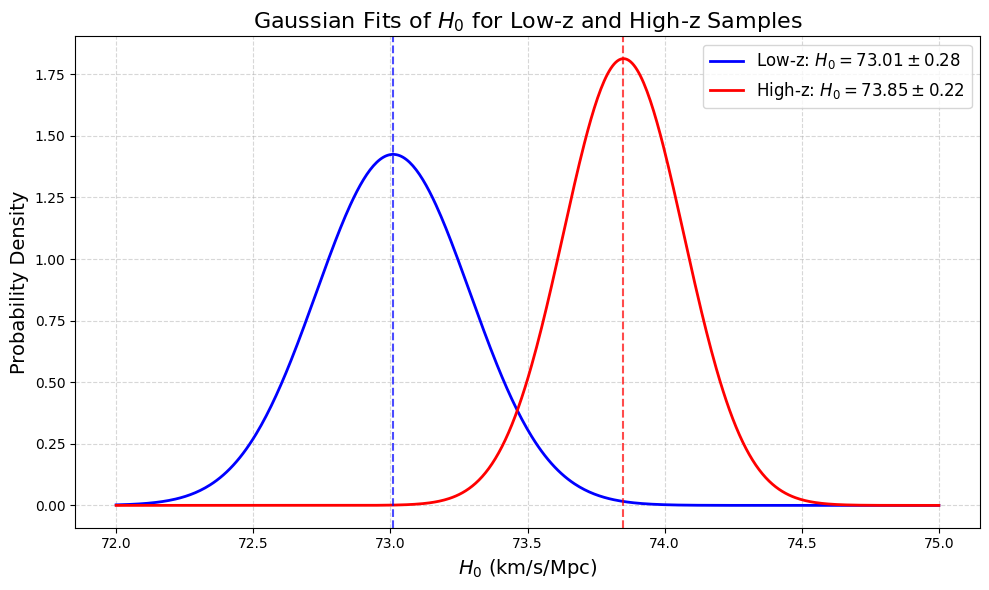

In [ ]:
from scipy.stats import norm

# Given H0 fits
mu_low, sigma_low = 73.01, 0.28
mu_high, sigma_high = 73.85, 0.22

# Define H0 range covering both Gaussians
x = np.linspace(72, 75, 500)

# Calculate PDF (Gaussian bell curves)
pdf_low = norm.pdf(x, mu_low, sigma_low)
pdf_high = norm.pdf(x, mu_high, sigma_high)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_low, label=f'Low-z: $H_0 = {mu_low} \pm {sigma_low}$', color='blue', linewidth=2)
plt.plot(x, pdf_high, label=f'High-z: $H_0 = {mu_high} \pm {sigma_high}$', color='red', linewidth=2)

# Mean markers
plt.axvline(mu_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(mu_high, color='red', linestyle='--', alpha=0.7)

# Labels
plt.title('Gaussian Fits of $H_0$ for Low-z and High-z Samples', fontsize=16)
plt.xlabel('$H_0$ (km/s/Mpc)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


There is only a slight overlap in the gaussian fits and judging from the significance level of 2.38 sigma we cannot ignore this difference.

There could be several reasons for this mismtch in Hubble Constant Values:


1.  There is an imbalance between the no. of datapoints for low and high red shifts, while not signifant, might contribute to the difference.
2.  The low-𝑧 supernovae are usually better calibrated using Cepheid variable stars/Supernovae and are part of the local distance ladder.
The high-z ones rely more heavily on cosmological model assumptions for distance, introducing model-dependent tension.
3.  If the dark energy equation of state or other parameters evolve with redshift, then assuming a constant ΛCDM model can lead to small biases in inferred 𝐻0.



In [ ]:
print(z[z<0.1].shape)
print(z[z>=0.1].shape)
print(z.shape)
#shows the imbalance

(741,)
(960,)
(1701,)


#EXTRA

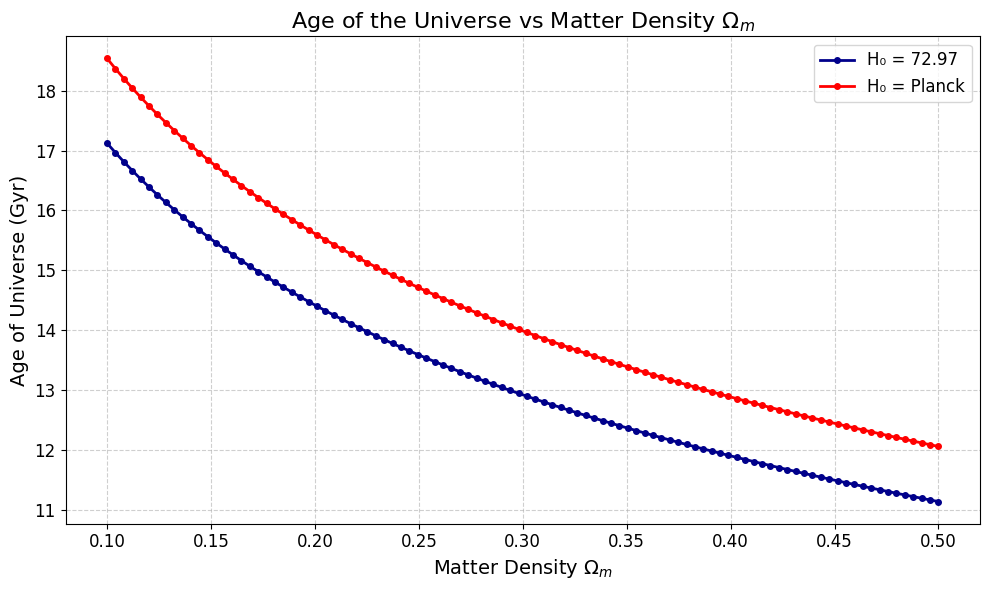

In [ ]:
#plot that compares both Our Model H0 value Planck18 H0 value
age_planck = [age_of_universe(67.4, O) for O in Om]

plt.figure(figsize=(10, 6))
plt.plot(Om, age, color='darkblue', linewidth=2, linestyle='-', marker='o', markersize=4, label=f'H₀ = {H0_fit:.2f}')
plt.plot(Om, age_planck, color='red', linewidth=2, linestyle='-', marker='o', markersize=4, label=f'H₀ = Planck')
plt.title('Age of the Universe vs Matter Density $\\Omega_m$', fontsize=16)
plt.xlabel('Matter Density $\\Omega_m$', fontsize=14)
plt.ylabel('Age of Universe (Gyr)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

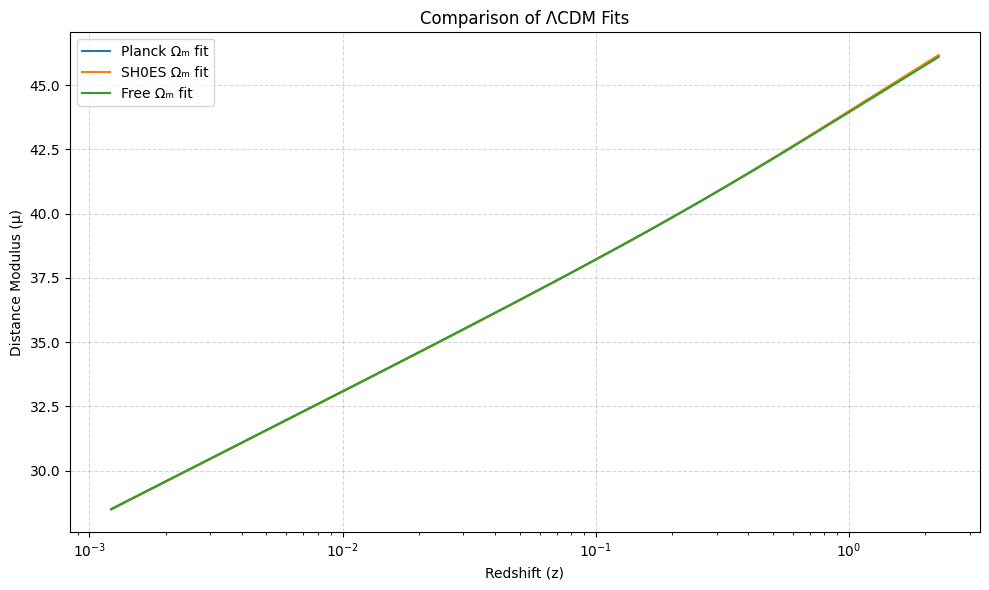

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(z_fit, mu_model(z_fit, H0_fit_planck, 0.315), label='Planck Ωₘ fit')
plt.plot(z_fit, mu_model(z_fit, H0_fit_fixed, 0.3), label='SH0ES Ωₘ fit')
plt.plot(z_fit, mu_model(z_fit, H0_fit, Om_fit), label='Free Ωₘ fit')

plt.xscale('log')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Comparison of ΛCDM Fits')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
mu = cosmo.distmod(z).value


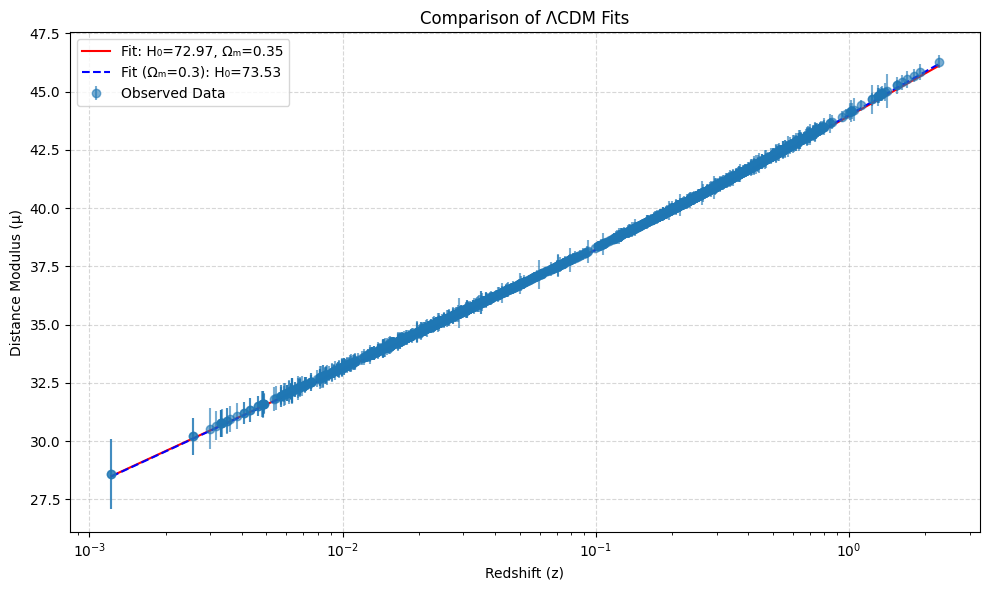

In [ ]:
plt.figure(figsize=(10, 6))

# Observed supernova data
plt.errorbar(z, mu, yerr=mu_err, fmt='o', label='Observed Data', alpha=0.6)

# 2-parameter fit line
plt.plot(z_fit, mu_fit, 'r-', label=f'Fit: H₀={H0_fit:.2f}, Ωₘ={Om_fit:.2f}')

# 1-parameter fit line
plt.plot(z_fit, mu_fit_fixed, 'b--', label=f'Fit (Ωₘ=0.3): H₀={H0_fit_fixed:.2f}')

# Styling
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Comparison of ΛCDM Fits')
plt.legend()
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

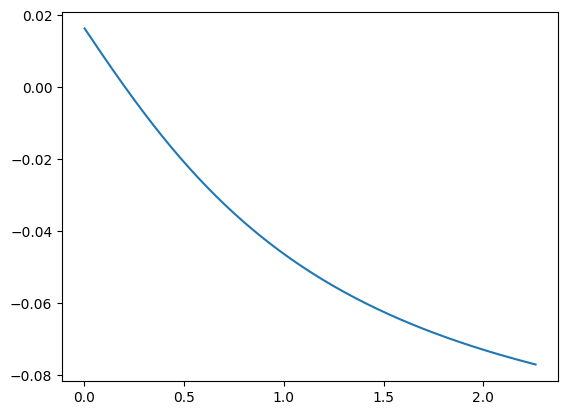

In [ ]:
delta_mu = mu_fit - mu_fit_fixed
plt.plot(z_fit, delta_mu)
